# Exercise 13: Handwritten digits

3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'`, the default solver had a bug, at least in my version.

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?

In [10]:
import numpy as np
import pylab as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits['data']
y = digits['target']


In [8]:
from sklearn.manifold import Isomap

isomap = Isomap()
isomap.fit(X,y[:,None]) ;

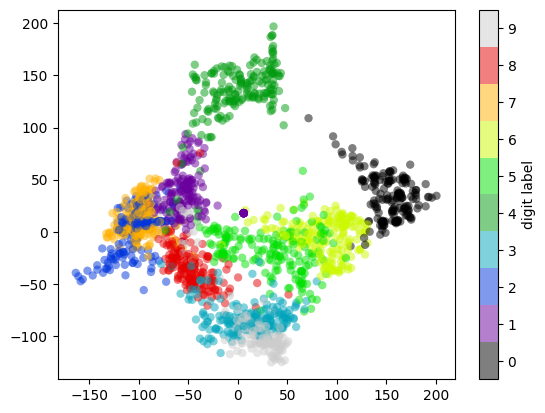

In [13]:
reduced_data = isomap.transform(X)

plt.scatter(reduced_data[:,0], reduced_data[:,1], 
            c=digits.target, edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('nipy_spectral', 10));

plt.colorbar(label='digit label', ticks=range(10))

plt.clim(-0.5, 9.5)

In [14]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=404, train_size=0.8)
print(Xtrain.shape, Xtest.shape)

(1437, 64) (360, 64)


In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=2000,solver='sag')
clf.fit(Xtrain,ytrain)

LogisticRegression(max_iter=2000, solver='sag')

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

ypred = clf.predict(Xtest)
score = accuracy_score(ytest, ypred)
print(f'score = {score}')
print(confusion_matrix(ytest, ypred))

score = 0.9583333333333334
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  1  0  0  0  0  1  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  1  1  1]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  1  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  1  0 27  0  1]
 [ 0  3  0  0  1  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  1 36]]


Score by eye: 0.91 (I swear!)